In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [3]:
filename = "04-25-2020.csv"
data = pd.read_csv(filename)

# 1 - Printing head of data

In [4]:
data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-26 02:30:51,34.223334,-82.461707,24,0,0,24,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-26 02:30:51,30.295065,-92.414197,130,7,0,123,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-26 02:30:51,37.767072,-75.632346,146,3,0,143,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-26 02:30:51,43.452658,-116.241552,650,15,0,635,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-26 02:30:51,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


# 2 - Printing latest confirmed, deaths, recovered by country

In [5]:
confirmed = data.groupby(data.Country_Region).Confirmed.sum()

#print (confirmed)

deaths = data.groupby(data.Country_Region).Deaths.sum()

#print (deaths)

recovered = data.groupby(data.Country_Region).Recovered.sum()

#print (recovered)

In [6]:
data ['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths']
result2 = data.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].apply(sum).reset_index()
# the double bracket is important because we need to be using a list ! otherwise error
print (result2)

         Country_Region  Confirmed  Deaths  Recovered  Active
0           Afghanistan       1463      47        188    1228
1               Albania        712      27        403     282
2               Algeria       3256     419       1479    1358
3               Andorra        738      40        344     354
4                Angola         25       2          6      17
..                  ...        ...     ...        ...     ...
180  West Bank and Gaza        342       2         92     248
181      Western Sahara          6       0          5       1
182               Yemen          1       0          1       0
183              Zambia         84       3         37      44
184            Zimbabwe         31       4          2      25

[185 rows x 5 columns]


# 3 - Printing number of deaths and recovered country and statewise

In [7]:
result3 = data.groupby(['Country_Region','Province_State'])[['Confirmed','Deaths', 'Recovered']].apply(sum)
# the double bracket is important because we need to be using a list ! otherwise error
print (result3)

                                             Confirmed  Deaths  Recovered
Country_Region Province_State                                            
Australia      Australian Capital Territory        106       3         98
               New South Wales                    2994      33       2193
               Northern Territory                   28       0          0
               Queensland                         1026       6        803
               South Australia                     438       4        401
...                                                ...     ...        ...
United Kingdom Falkland Islands (Malvinas)          13       0         11
               Gibraltar                           136       0        131
               Isle of Man                         308      18        243
               Montserrat                           11       1          2
               Turks and Caicos Islands             11       1          4

[138 rows x 3 columns]


# 4 - Printing the situation for China alone (sorted by confirmed cases)

In [8]:
china = data[data["Country_Region"]=="China"]

result4 = china.groupby('Province_State')[['Confirmed','Deaths','Recovered']].apply(sum).sort_values(by="Confirmed",ascending=False)

print (result4)

                Confirmed  Deaths  Recovered
Province_State                              
Hubei               68128    4512      63604
Guangdong            1586       8       1542
Henan                1276      22       1254
Zhejiang             1268       1       1257
Hong Kong            1037       4        753
Hunan                1019       4       1015
Anhui                 991       6        985
Jiangxi               937       1        936
Heilongjiang          935      13        511
Shandong              787       7        767
Jiangsu               653       0        646
Shanghai              642       7        558
Beijing               593       8        525
Chongqing             579       6        573
Sichuan               561       3        558
Fujian                355       1        349
Hebei                 328       6        318
Shaanxi               286       3        253
Guangxi               254       2        252
Inner Mongolia        198       1        121
Shanxi    

# 5 - Printing number of deaths countrywise

In [9]:
result5 = data.groupby("Country_Region")[["Deaths"]].apply(sum).sort_values(by="Deaths",ascending=False)

print (result5)

                Deaths
Country_Region        
US               53755
Italy            26384
Spain            22902
France           22648
United Kingdom   20381
...                ...
Guinea-Bissau        0
Eritrea              0
Dominica             0
South Sudan          0
Cambodia             0

[185 rows x 1 columns]


# 6 - Countries where there have been no recoveries

In [10]:
data_per_country = data.groupby("Country_Region")[["Confirmed","Recovered","Deaths"]].apply(sum)

result6 = data_per_country[data_per_country['Recovered']==0][["Confirmed","Recovered","Deaths"]]

print (result6)

                       Confirmed  Recovered  Deaths
Country_Region                                     
Botswana                      22          0       1
MS Zaandam                     9          0       2
Papua New Guinea               8          0       0
Sao Tome and Principe          4          0       0
South Sudan                    5          0       0


# 7 - Countries where all cases died

In [11]:
result7 = data_per_country[data_per_country['Confirmed']==data_per_country['Deaths']][["Confirmed","Recovered","Deaths"]]

print (result7)

Empty DataFrame
Columns: [Confirmed, Recovered, Deaths]
Index: []


# 8  - Countries where all cases recovered

In [12]:
result8 = data_per_country[data_per_country['Confirmed']==data_per_country['Recovered']][["Confirmed","Recovered","Deaths"]]

print (result8)

                Confirmed  Recovered  Deaths
Country_Region                              
Saint Lucia            15         15       0
Yemen                   1          1       0


# 9 - Top 10 Countries with most cases

In [13]:
result9 = data_per_country.sort_values(by="Confirmed",ascending=False)[:10][["Confirmed","Recovered","Deaths"]]

print (result9)

                Confirmed  Recovered  Deaths
Country_Region                              
US                 938154     100372   53755
Spain              223759      95708   22902
Italy              195351      63120   26384
France             161644      45372   22648
Germany            156513     109800    5877
United Kingdom     149569        774   20381
Turkey             107773      25582    2706
Iran                89328      68193    5650
China               83909      78175    4636
Russia              74588       6250     681


# 10 - Plotting data countrywise for countries with more than 150 deaths

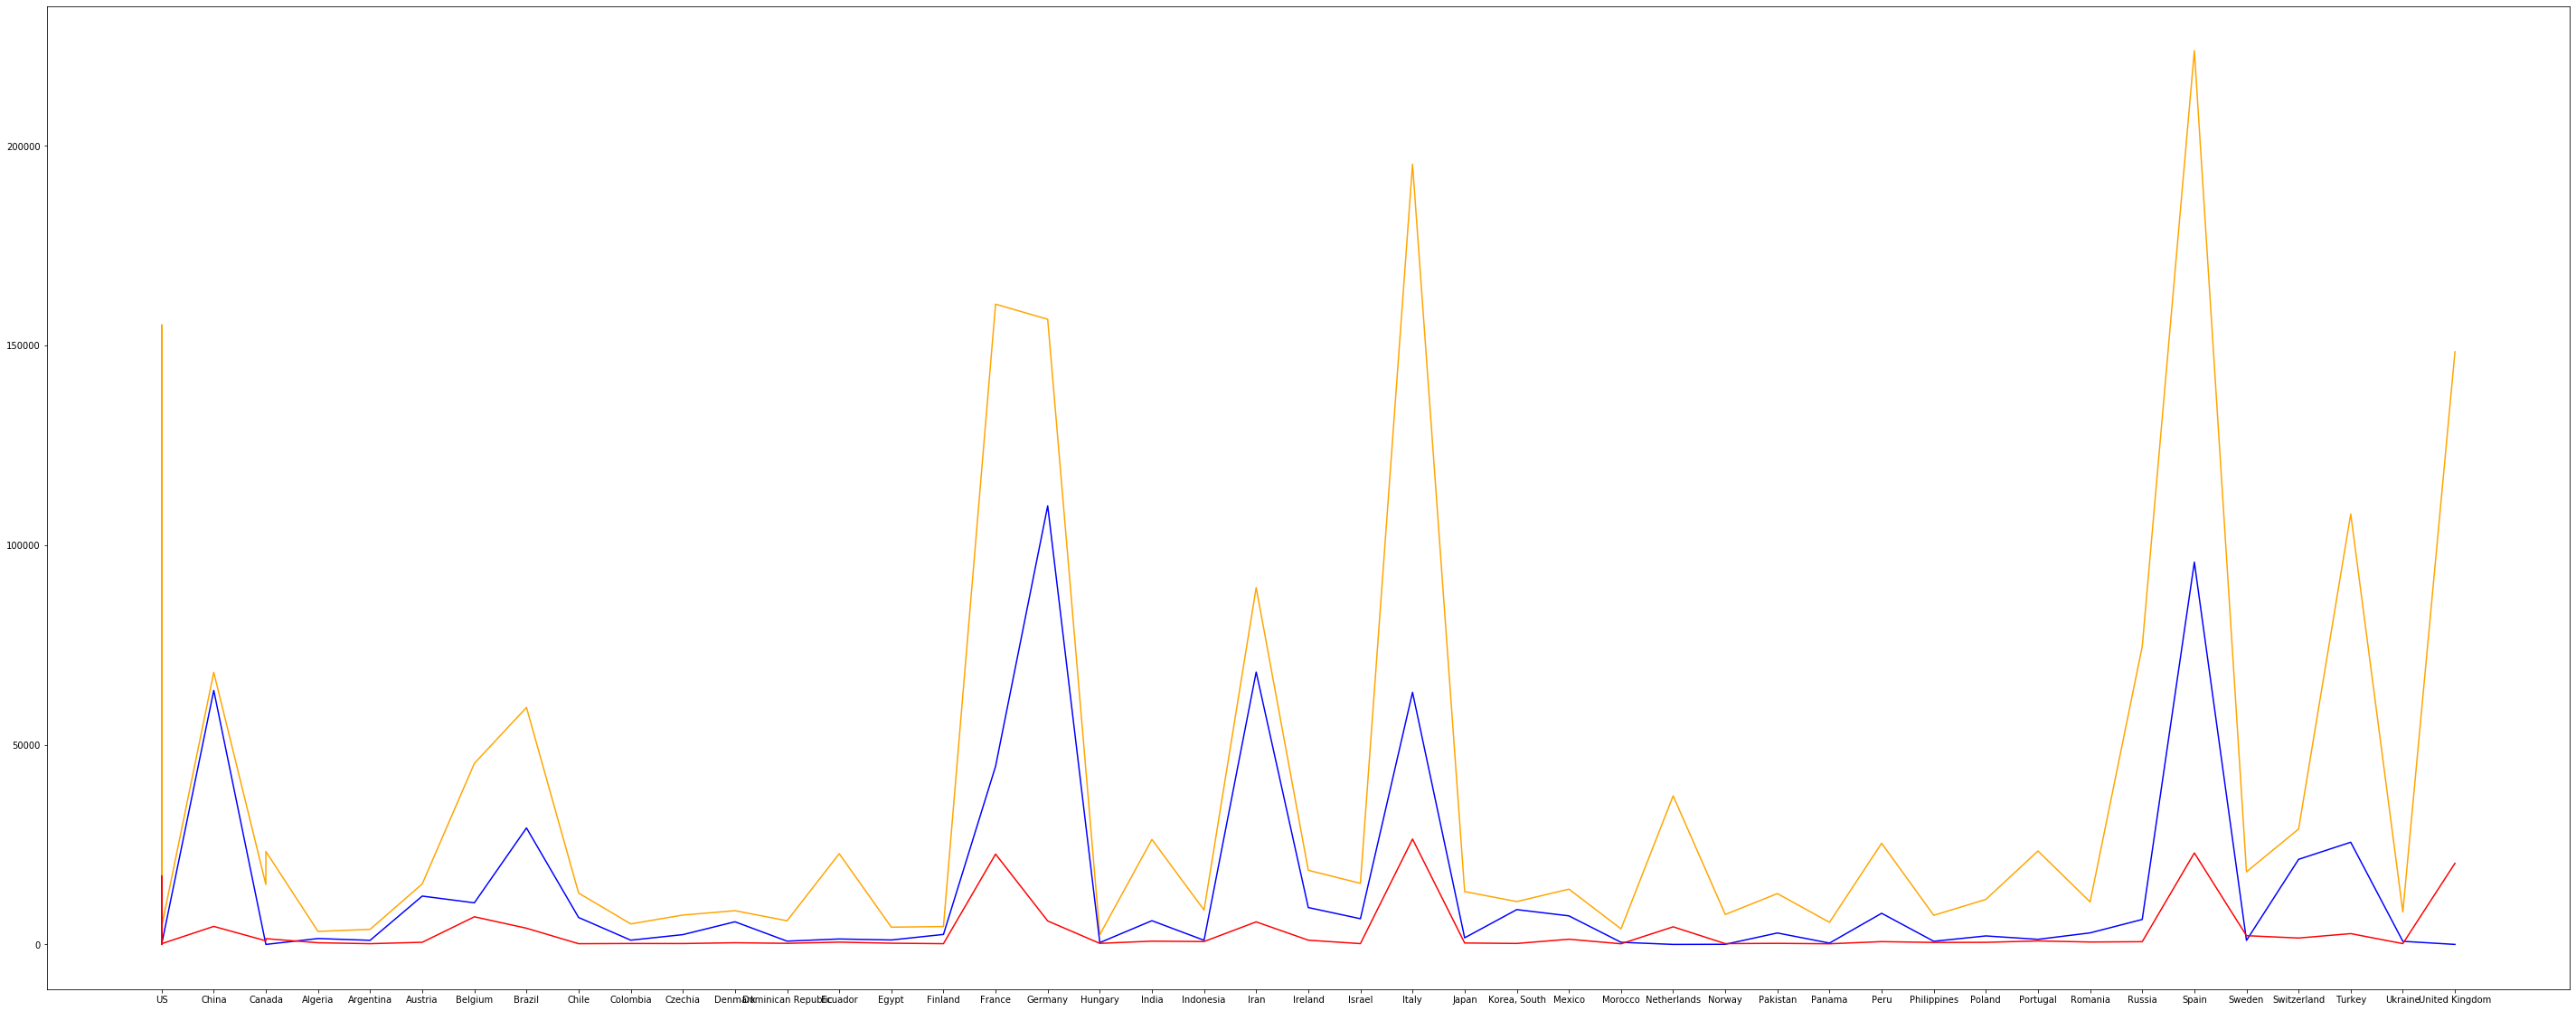

In [14]:
top_countries = data[data["Deaths"]>150]


plt.figure(figsize=(50,20))
plt.plot(top_countries["Country_Region"],top_countries["Confirmed"],color='orange')
plt.plot(top_countries["Country_Region"],top_countries["Recovered"],color='blue')
plt.plot(top_countries["Country_Region"],top_countries["Deaths"],color='red')
plt.show()

# 11 - Death cases in the US by state

In [43]:
usa_data = data[(data["Country_Region"]=="US") & (data["Deaths"]>0)]

usa_data = usa_data.groupby("Province_State").Deaths.size().reset_index().sort_values(by="Deaths",ascending=False)

usa_data.head()

,Province_State,Deaths
10,Georgia,109
47,Texas,81
16,Indiana,66
51,Virginia,63
35,North Carolina,59


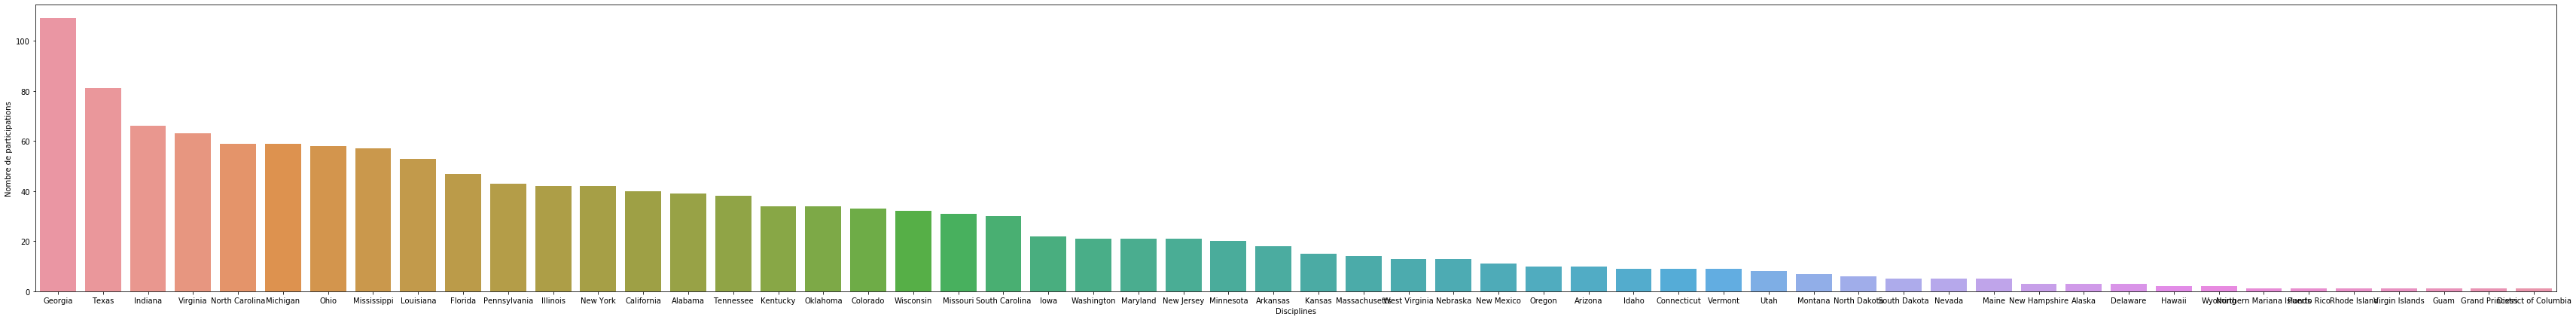

In [44]:
plt.figure(figsize=(60,7))
sns.barplot(x="Province_State",y="Deaths",data = usa_data)
plt.xlabel('States')
plt.ylabel('Number of deaths')
plt.show()

# 12 - Same but for active cases

In [46]:
usa_data = data[(data["Country_Region"]=="US") & (data["Active"]>0)]

usa_data = usa_data.groupby("Province_State").Active.size().reset_index().sort_values(by="Active",ascending=False)

usa_data.head()

,Province_State,Active
48,Texas,206
11,Georgia,159
52,Virginia,128
20,Kentucky,111
28,Missouri,99


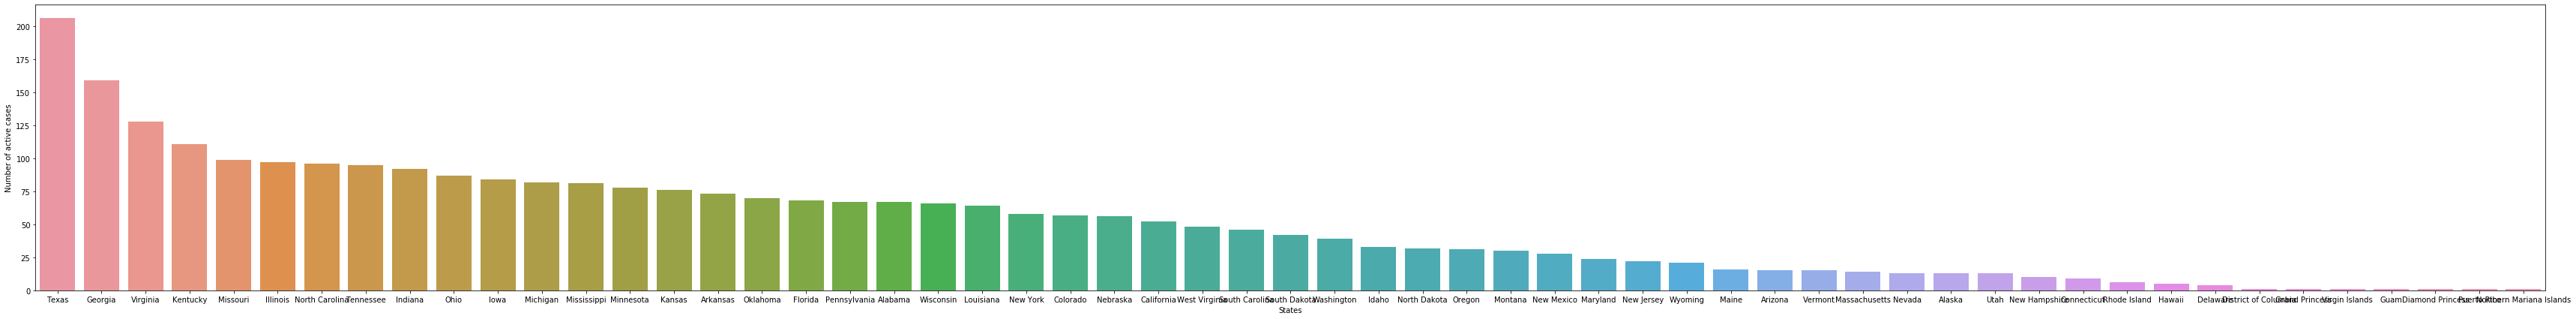

In [48]:
plt.figure(figsize=(60,7))
sns.barplot(x="Province_State",y="Active",data = usa_data)
plt.xlabel('States')
plt.ylabel('Number of active cases')
plt.show()

# 13 - All data in the US

In [62]:
combine_us_data = data[data['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)

combine_us_data = combine_us_data[combine_us_data.sum(axis = 1) > 0]

combine_us_data = combine_us_data.groupby(['Province_State'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

combine_us_data.head()

,Province_State,Confirmed,Deaths,Recovered,Active
0,Alabama,6026,209,0,5817
1,Alaska,339,9,0,330
2,Arizona,6286,273,0,6013
3,Arkansas,2911,48,0,2863
4,California,42368,1689,0,40679


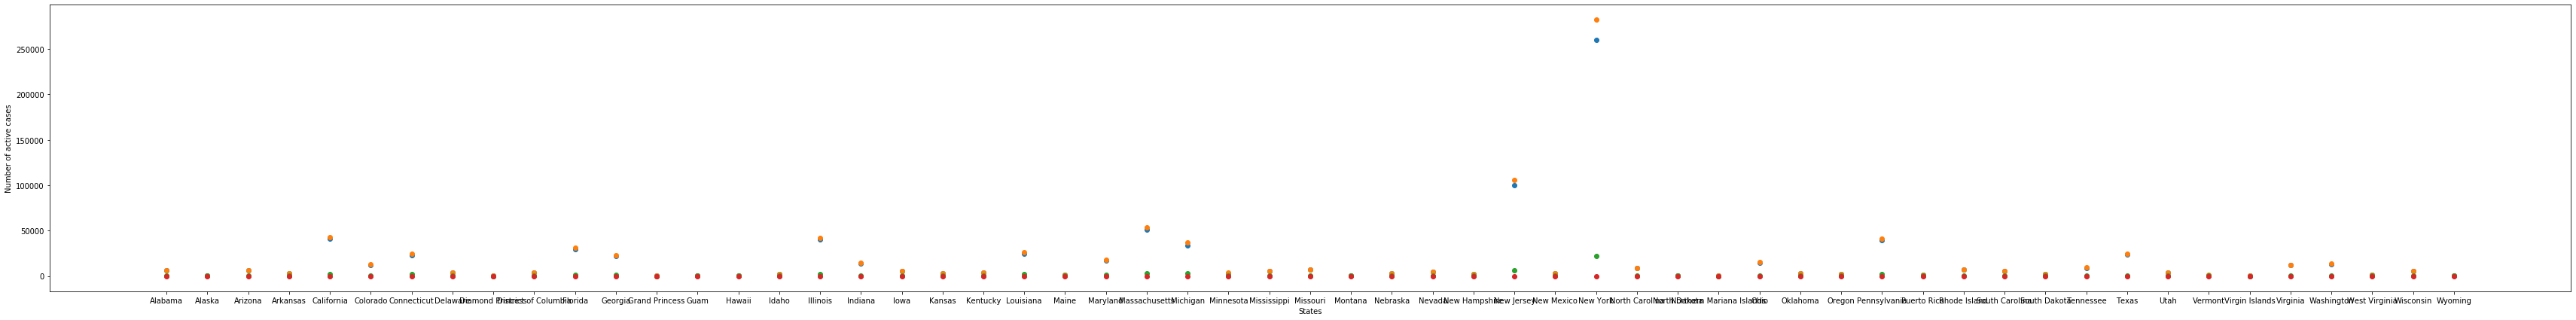

In [70]:
plt.figure(figsize=(60,7))
plt.scatter(x="Province_State",y="Active",data = combine_us_data)
plt.scatter(x="Province_State",y="Confirmed",data = combine_us_data)
plt.scatter(x="Province_State",y="Deaths",data = combine_us_data)
plt.scatter(x="Province_State",y="Recovered",data = combine_us_data)
plt.xlabel('States')
plt.ylabel('Number of active cases')
plt.show()